In [ ]:
#importing Libraries
import seaborn as sns
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])

df_DA_USA['salary_year_avg'].sample(10)

757398     70000.0
433143     60000.0
377271     85000.0
209127    100700.0
723962     67818.0
589613    115000.0
711783    111175.0
430032     52500.0
209665     70000.0
109935     65000.0
Name: salary_year_avg, dtype: float64

<Axes: >

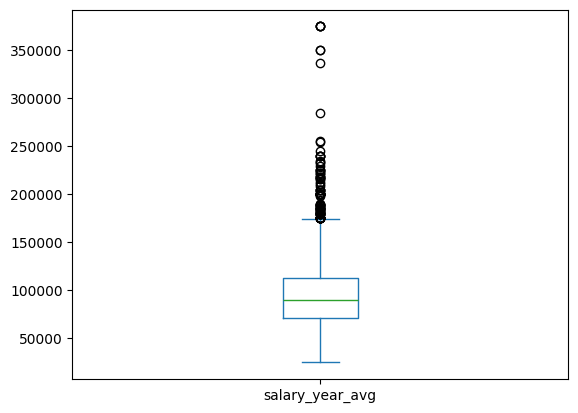

In [6]:
df_DA_USA['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x17fb883a150>,
 'caps': [<matplotlib.lines.Line2D at 0x17fb8840cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fb883ab10>],
 'medians': [<matplotlib.lines.Line2D at 0x17fb8842250>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fb8842dd0>],
 'means': []}

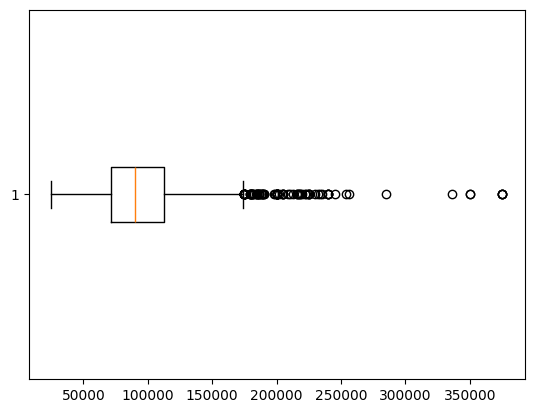

In [7]:
plt.boxplot(df_DA_USA['salary_year_avg'],vert = False)

C:\Users\Joy\AppData\Local\Temp\ipykernel_16060\1986209170.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert= False)


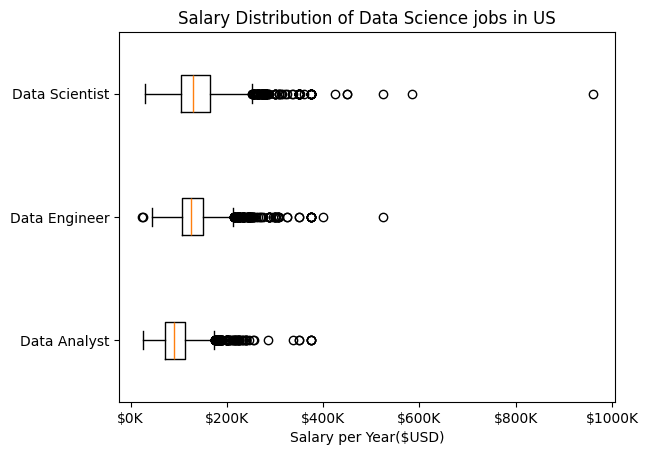

In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_USA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_USA = df_USA.dropna(subset= ['salary_year_avg'])

job_list= [df_USA[df_USA['job_title_short']== job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert= False)

ax= plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

plt.title('Salary Distribution of Data Science jobs in US')
plt.xlabel('Salary per Year($USD)')

plt.show()

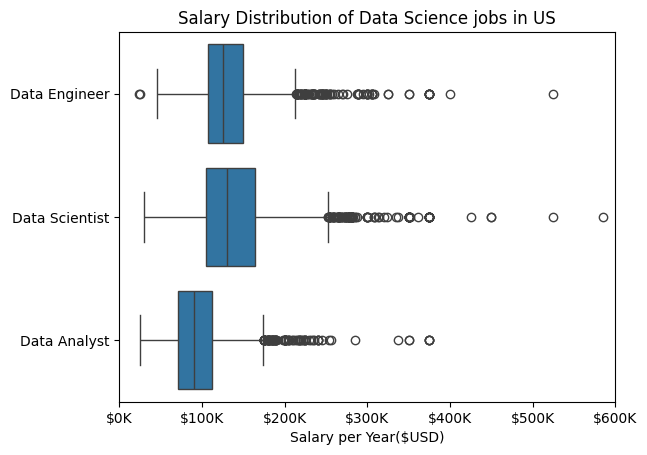

In [10]:
sns.boxplot(data= df_USA, x= 'salary_year_avg', y = 'job_title_short')

ax= plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

plt.title('Salary Distribution of Data Science jobs in US')
plt.xlabel('Salary per Year($USD)')
plt.xlim(0,600000)
plt.ylabel('')
plt.show()